In [1]:
import pandas as pd
from sklearn import mixture
import numpy as np
import os

from matplotlib.colors import LogNorm

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans


import random
import datetime

import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv('./Proj_Data/node.csv', index_col=0)
df.head()

,index,ID,q,k,v,Long,Lat
0,0,715898,410.684028,0.090358,62.457812,-118.021787,33.880183
1,3,715929,405.503472,0.154721,54.573437,-118.123095,33.971707
2,5,715933,383.663194,0.131772,56.324479,-118.130679,33.981839
3,6,715938,393.451389,0.137075,54.980208,-118.150997,34.002541
4,7,715944,381.265625,0.151283,56.689583,-118.166091,34.013676


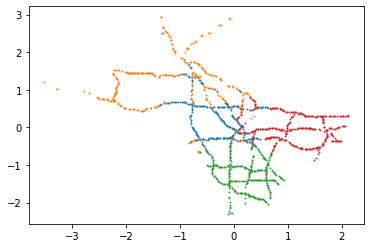

In [11]:
n_clusters = 4
input_feature = ['Long', 'Lat', 'q']  # with spatial information, but no connectivity
km_cluster = KMeans(n_clusters=n_clusters, max_iter=500, init='k-means++', random_state=1)

X_train_km_cluster = df[input_feature]
# 
scaler_km_cluster = StandardScaler()
scaler_km_cluster.fit(X_train_km_cluster)

X_train_km_cluster= scaler_km_cluster.transform(X_train_km_cluster)
#
clf = km_cluster.fit(X_train_km_cluster) 

df['Kmeans'] =km_cluster.predict(X_train_km_cluster)
#
df_train_lt = []


# 
for n_ in range(n_clusters):
    df_train_n = df[df.Kmeans == n_]
    df_train_lt.append(df_train_n)
    
#
plt.figure()
result=clf.predict(X_train_km_cluster)  # partition result
for i in range(len(result)):
    plt.scatter(X_train_km_cluster[result==i,0],X_train_km_cluster[result==i,1],.8)


## next by K.Z.

In [12]:
df['cls'] = result

In [13]:
nodes = df.copy()
edges = pd.read_csv('Proj_Data/edges_with_qkv.csv', index_col=0)

In [14]:
data_new = pd.read_csv('./Proj_Data/2019-10-21_with_cord.csv', index_col=0)
data_new = data_new.loc[data_new['Lane type']=='ML']

In [15]:
data_new['cls'] = ''
for i in nodes.index:
    ID = nodes.loc[i, 'ID']
    cls = nodes.loc[i, 'cls']
    data_new.loc[data_new['ID']==ID, 'cls'] = cls
data_new['q0'] = data_new['q'] * 12
data_new['k0'] = data_new['q0'] / data_new['Avg v']

There are 4 classes


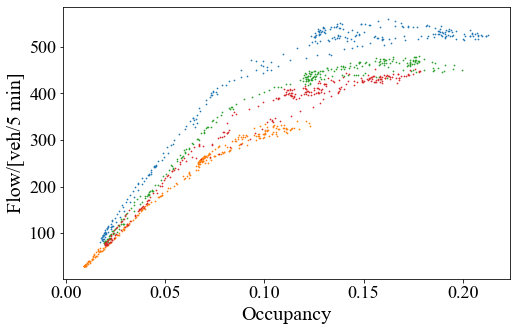

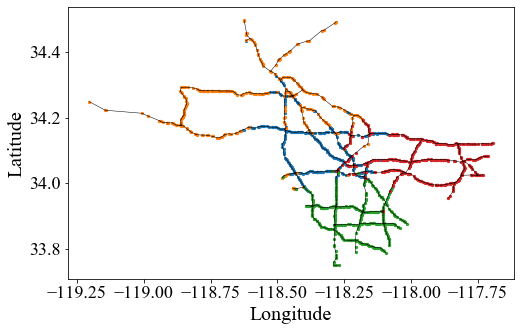

In [57]:
c = 0
c_set = []
color_set = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.rcParams['font.family'] = 'Times New Roman'
fig_mfd = plt.figure(figsize=[8,5])
ax_mfd = fig_mfd.add_subplot(111)
fig_net = plt.figure(figsize=[8,5])
ax_net = fig_net.add_subplot(111)

for i in edges.index:
    node1 = edges.loc[i, 'node1']
    node2 = edges.loc[i, 'node2']
    ax_net.plot([nodes.loc[node1, 'Long'], nodes.loc[node2, 'Long']], [nodes.loc[node1, 'Lat'], nodes.loc[node2, 'Lat']], 'black', lw=0.5)

ft = 20
font = {'family': 'Times New Roman',
         'weight': 'normal',
        'size': ft,
        }

for i in [0,1,2,3]:
    data_cls = data_new.loc[data_new['cls']==i].sort_values(by=['ID', 'Time'])
    q_cls = data_cls['q'].values
    if q_cls.reshape(-1, 288).shape[0] <= 1:
        continue
    q_cls_avg = q_cls.reshape(-1, 288).mean(axis=0)
    k_cls = data_cls['Avg k'].values
    k_cls_avg = k_cls.reshape(-1, 288).mean(axis=0)
    ax_mfd.scatter(k_cls_avg, q_cls_avg, s=.5, c=color_set[c])
    ax_mfd.set_xlabel('Occupancy', fontdict=font)
    ax_mfd.set_ylabel('Flow/[veh/5 min]', fontdict=font)
    ax_mfd.tick_params(axis='both', which='major', labelsize=ft*0.9)
    
    lng = nodes.loc[nodes['cls']==i, 'Long']
    lat = nodes.loc[nodes['cls']==i, 'Lat']
    ax_net.scatter(lng, lat, s=5, c=color_set[c])
    ax_net.set_xlabel('Longitude', fontdict=font)
    ax_net.set_ylabel('Latitude', fontdict=font)
    ax_net.tick_params(axis='both', which='major', labelsize=ft*0.9)
    c+=1
    c_set.append(i)
print('There are %i classes'%c)
# fig_mfd.savefig('./img/kmeans_fig_mfd.svg', format='svg')
# fig_net.savefig('./img/kmeans_fig_net.svg', format='svg')

fig_mfd.savefig('./img/kmeans_fig_mfd.png', dpi=500)
fig_net.savefig('./img/kmeans_fig_net.png', dpi=500)

In [48]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [28]:
# a = 3
for a in [2,1,0,3]:
    NSk = 0
    for c in c_set:
        NSk += 2*nodes.loc[nodes['cls']==a, 'q'].std()**2/(nodes.loc[nodes['cls']==a, 'q'].std()**2+nodes.loc[nodes['cls']==c, 'q'].std()**2+(nodes.loc[nodes['cls']==a, 'q'].mean()-nodes.loc[nodes['cls']==c, 'q'].mean())**2)
    print(NSk/len(c_set))

0.8575107333254863
0.520880285951095
0.6097973182485462
0.7000936382837099


In [29]:
TV = 0
for c in c_set:
    TV += nodes.loc[nodes['cls']==c, 'q'].__len__()*nodes.loc[nodes['cls']==c, 'q'].std()**2
print(TV)

7846381.680713125
